<a href="https://colab.research.google.com/github/harshit7962/Chocolate_Detection/blob/main/Sorting_Arm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
#Initialising the CNN
model = Sequential()

In [ ]:
#Step1 - Convolution
model.add(Convolution2D(32,3,3, padding='same', input_shape=(256,256,3), activation='relu'))

In [ ]:
#Step2 - Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding second convolutional layer
model.add(Convolution2D(32,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Step3 - Flattening
model.add(Flatten())

In [ ]:
#Step4 - Full Connection
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Fitting the CNN to the imaged
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing the dataset
train_path = '/content/drive/MyDrive/Sorting_Arm/training_set'
test_path = '/content/drive/MyDrive/Sorting_Arm/test_set'

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (256,256),
    batch_size=32,
    class_mode='binary'
)

test_set = train_datagen.flow_from_directory(
    test_path,
    target_size = (256,256),
    batch_size=32,
    class_mode='binary'
)

Found 334 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [ ]:
model.fit(
    training_set,
    steps_per_epoch = 334//32,
    epochs = 25,
    validation_data = test_set,
    validation_steps = 77//32
)

Epoch 1/25
10/10 [==============================] - 352s 36s/step - loss: 0.6743 - accuracy: 0.5430 - val_loss: 0.6123 - val_accuracy: 0.6406
Epoch 2/25
10/10 [==============================] - 84s 9s/step - loss: 0.6061 - accuracy: 0.6093 - val_loss: 0.5528 - val_accuracy: 0.7656
Epoch 3/25
10/10 [==============================] - 83s 9s/step - loss: 0.5111 - accuracy: 0.8278 - val_loss: 0.4020 - val_accuracy: 0.8594
Epoch 4/25
10/10 [==============================] - 85s 9s/step - loss: 0.4144 - accuracy: 0.8510 - val_loss: 0.2605 - val_accuracy: 0.9062
Epoch 5/25
10/10 [==============================] - 84s 9s/step - loss: 0.2967 - accuracy: 0.8907 - val_loss: 0.2762 - val_accuracy: 0.8906
Epoch 6/25
10/10 [==============================] - 83s 8s/step - loss: 0.2809 - accuracy: 0.9106 - val_loss: 0.2309 - val_accuracy: 0.9531
Epoch 7/25
10/10 [==============================] - 84s 9s/step - loss: 0.2242 - accuracy: 0.9305 - val_loss: 0.1561 - val_accuracy: 0.9531
Epoch 8/25
10/10 [

In [ ]:
model.save_weights("model.h5")

In [ ]:
#Saving the model
!mkdir -p save_model
model.save('/content/drive/MyDrive/saved_model/sorting_arm')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/sorting_arm/assets


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/sorting_arm')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 86, 86, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 43, 43, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

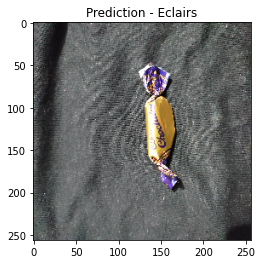

In [ ]:
from tensorflow.keras.preprocessing import image
category = {
    0:['eclairs', 'Eclairs'],
    1:['pulse','Pulse'], 
     }
filename = '/content/drive/MyDrive/Sorting_Arm/test_set/eclair/IMG_20211113_224206.jpg'
img = image.load_img(filename, target_size=(256,256))
img_array = image.img_to_array(img)
img_processed = np.expand_dims(img_array, axis=0)
img_processed /=255.

prediction = new_model.predict(img_processed)
# index = np.argmax(prediction)
# plt.title("Prediction - {}".format(category[index][1]))

if(prediction[0][0]>0.5):
  plt.title("Prediction - Pulse")
else: 
  plt.title("Prediction - Eclairs")
plt.imshow(img_array)